In [1]:
import warnings

import pandas as pd

from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)
pd.set_option("float_format", "{:.4f}".format)
sns.set_style("whitegrid")

# Data Loading

[Ref] https://archive.ics.uci.edu/dataset/242/energy+efficiency

In [2]:
path = "./data/ENB2012_data.xlsx"
_df = pd.read_excel(path)

_df.columns = [
    "Relative_Compactness",
    "Surface_Area",
    "Wall_Area",
    "Roof_Area",
    "Overall_Height",
    "Orientation",
    "Glazing_Area",
    "Glazing_Area_Distribution",
    "Heating_Load",
    "Cooling_Load",
]

_df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.9800,514.5000,294.0000,110.2500,7.0000,2,0.0000,0,15.5500,21.3300
1,0.9800,514.5000,294.0000,110.2500,7.0000,3,0.0000,0,15.5500,21.3300
2,0.9800,514.5000,294.0000,110.2500,7.0000,4,0.0000,0,15.5500,21.3300
3,0.9800,514.5000,294.0000,110.2500,7.0000,5,0.0000,0,15.5500,21.3300
4,0.9000,563.5000,318.5000,122.5000,7.0000,2,0.0000,0,20.8400,28.2800


# Preprocessing

In [3]:
scaler = StandardScaler()
df = scaler.fit_transform(_df)

df = pd.DataFrame(df, columns=_df.columns)

df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,2.0418,-1.7859,-0.5620,-1.4701,1.0000,-1.3416,-1.7604,-1.8146,-0.6701,-0.3427
1,2.0418,-1.7859,-0.5620,-1.4701,1.0000,-0.4472,-1.7604,-1.8146,-0.6701,-0.3427
2,2.0418,-1.7859,-0.5620,-1.4701,1.0000,0.4472,-1.7604,-1.8146,-0.6701,-0.3427
3,2.0418,-1.7859,-0.5620,-1.4701,1.0000,1.3416,-1.7604,-1.8146,-0.6701,-0.3427
4,1.2850,-1.2292,0.0000,-1.1987,1.0000,-1.3416,-1.7604,-1.8146,-0.1455,0.3884


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Relative_Compactness,768.0000,-0.0000,1.0007,-1.3638,-0.7726,-0.1340,0.6228,2.0418
Surface_Area,768.0000,-0.0000,1.0007,-1.7859,-0.7422,0.0232,0.7886,1.5539
Wall_Area,768.0000,0.0000,1.0007,-1.6859,-0.5620,0.0000,0.5620,2.2478
Roof_Area,768.0000,0.0000,1.0007,-1.4701,-0.7916,0.1583,0.9725,0.9725
Overall_Height,768.0000,0.0000,1.0007,-1.0000,-1.0000,0.0000,1.0000,1.0000
Orientation,768.0000,0.0000,1.0007,-1.3416,-0.6708,0.0000,0.6708,1.3416
Glazing_Area,768.0000,0.0000,1.0007,-1.7604,-1.0093,0.1174,1.2440,1.2440
Glazing_Area_Distribution,768.0000,0.0000,1.0007,-1.8146,-0.6855,0.1210,0.7662,1.4113
Heating_Load,768.0000,0.0000,1.0007,-1.6162,-0.9237,-0.3329,0.9283,2.0620
Cooling_Load,768.0000,-0.0000,1.0007,-1.4397,-0.9433,-0.2638,0.8988,2.4658


In [5]:
df['Orientation'].value_counts()

Orientation
-1.3416    192
-0.4472    192
0.4472     192
1.3416     192
Name: count, dtype: int64

In [7]:
_df['Orientation'].value_counts()

Orientation
2    192
3    192
4    192
5    192
Name: count, dtype: int64

In [6]:
df['Glazing_Area_Distribution'].value_counts()

Glazing_Area_Distribution
-1.1694    144
-0.5242    144
0.1210     144
0.7662     144
1.4113     144
-1.8146     48
Name: count, dtype: int64

In [8]:
_df['Glazing_Area_Distribution'].value_counts()

Glazing_Area_Distribution
1    144
2    144
3    144
4    144
5    144
0     48
Name: count, dtype: int64

# EDA

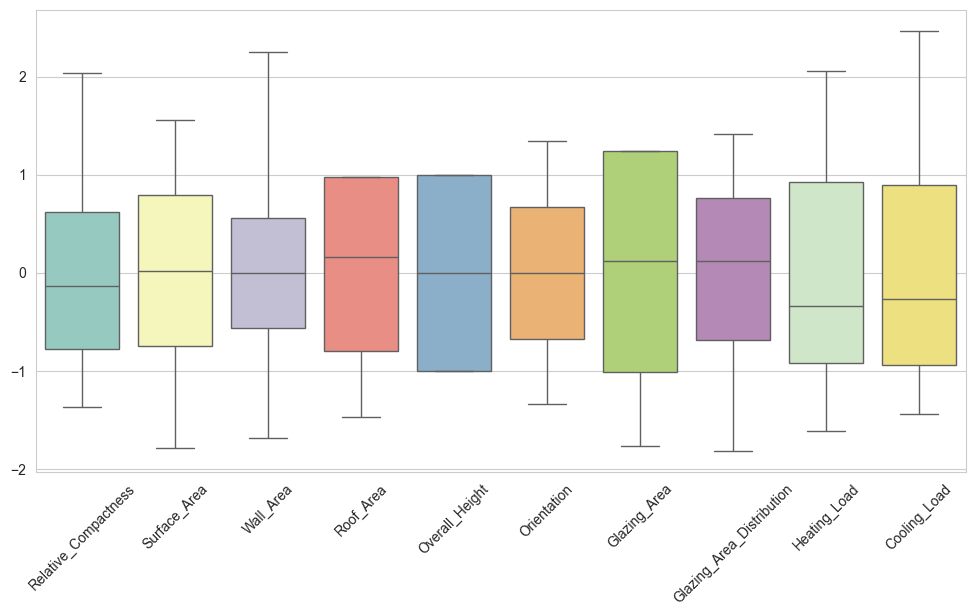

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Relative_Compactness', ylabel='Cooling_Load'>

<Figure size 1500x1000 with 0 Axes>

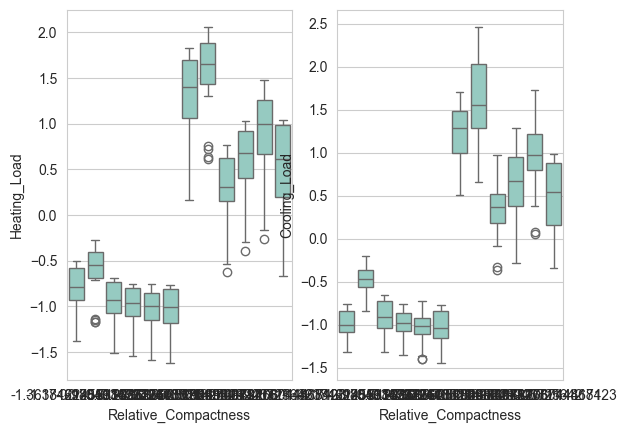

In [ ]:
plt.figure(figsize=(12, 10))
fig, ax=plt.subplots(nrows=1, ncols=2)
sns.boxplot(data=df, x="Relative_Compactness", y= "Heating_Load", ax=ax[0])
sns.boxplot(data=df, x="Relative_Compactness", y="Cooling_Load", ax=ax[1])

<Axes: xlabel='Surface_Area', ylabel='Cooling_Load'>

<Figure size 1200x1000 with 0 Axes>

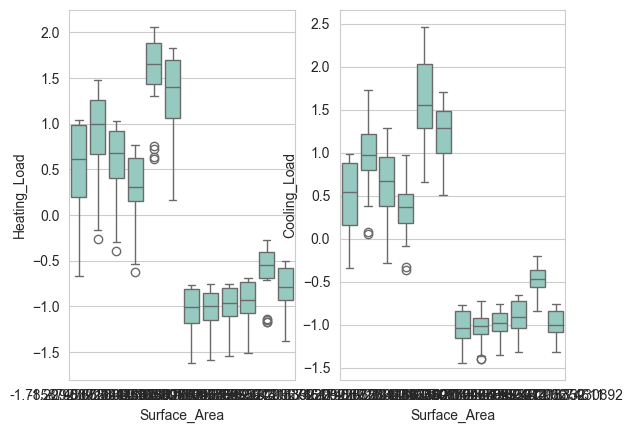

In [11]:
plt.figure(figsize=(12, 10))
fig, ax=plt.subplots(nrows=1, ncols=2)
sns.boxplot(data=df, x="Surface_Area", y= "Heating_Load", ax=ax[0])
sns.boxplot(data=df, x="Surface_Area", y="Cooling_Load", ax=ax[1])

<Axes: xlabel='Overall_Height', ylabel='Cooling_Load'>

<Figure size 1200x1000 with 0 Axes>

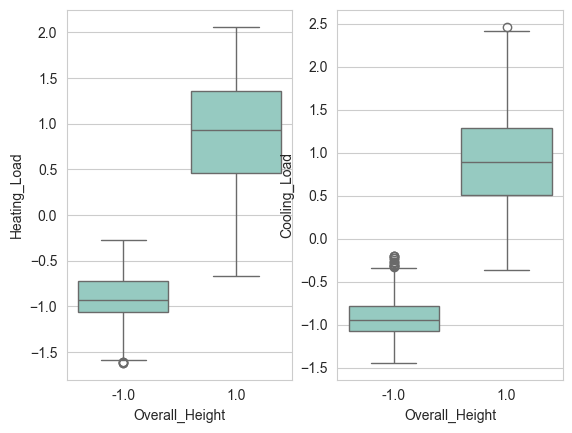

In [12]:
plt.figure(figsize=(12, 10))
fig, ax=plt.subplots(nrows=1, ncols=2)
sns.boxplot(data=df, x="Overall_Height", y= "Heating_Load", ax=ax[0])
sns.boxplot(data=df, x="Overall_Height", y="Cooling_Load", ax=ax[1])

<Axes: >

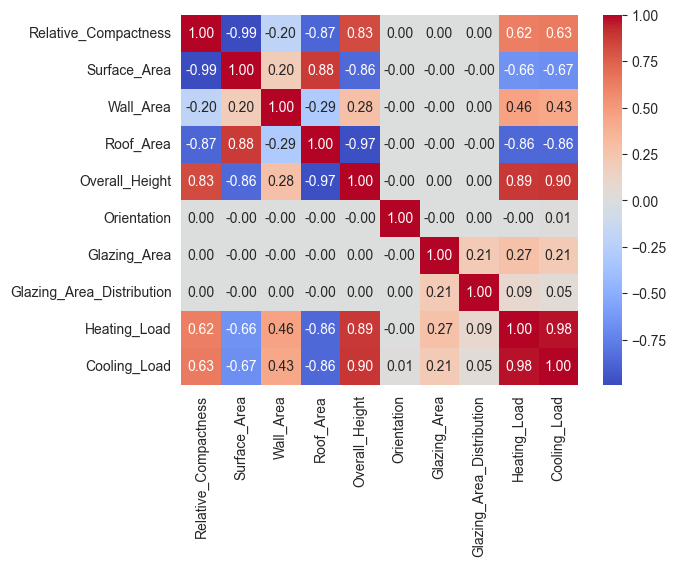

In [13]:
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")